In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("wildfires_training.csv")

In [4]:
df

,fire,year,temp,humidity,rainfall,drought_code,buildup_index,day,month,wind_speed
0,no,2015,28,59,0.0,8.06,3.47,1,6,19
1,no,2010,30,61,1.3,8.17,4.03,2,6,13
2,no,2009,26,83,13.1,8.08,3.59,3,6,22
3,no,2017,25,87,2.5,7.18,2.42,4,6,15
4,no,2014,28,77,0.0,14.98,4.63,5,6,18
...,...,...,...,...,...,...,...,...,...,...
149,yes,2017,31,67,0.0,45.15,17.89,26,9,15
150,no,2017,29,89,4.4,8.74,6.52,27,9,15
151,no,2009,27,88,0.5,8.87,3.71,28,9,30
152,no,2016,25,56,0.1,15.54,6.10,29,9,20


In [5]:
from sklearn.preprocessing import OrdinalEncoder

In [6]:
is_fire = ['no', 'yes']

In [7]:
enc = OrdinalEncoder(categories=[is_fire])

In [8]:
df['fire'] = enc.fit_transform(df[['fire']])

In [9]:
df

,fire,year,temp,humidity,rainfall,drought_code,buildup_index,day,month,wind_speed
0,0.0,2015,28,59,0.0,8.06,3.47,1,6,19
1,0.0,2010,30,61,1.3,8.17,4.03,2,6,13
2,0.0,2009,26,83,13.1,8.08,3.59,3,6,22
3,0.0,2017,25,87,2.5,7.18,2.42,4,6,15
4,0.0,2014,28,77,0.0,14.98,4.63,5,6,18
...,...,...,...,...,...,...,...,...,...,...
149,1.0,2017,31,67,0.0,45.15,17.89,26,9,15
150,0.0,2017,29,89,4.4,8.74,6.52,27,9,15
151,0.0,2009,27,88,0.5,8.87,3.71,28,9,30
152,0.0,2016,25,56,0.1,15.54,6.10,29,9,20


year            -0.060664
day              0.149659
month            0.163693
temp             0.563593
humidity        -0.525488
rainfall        -0.377136
drought_code     0.575877
buildup_index    0.625208
wind_speed      -0.118536
Name: fire, dtype: float64


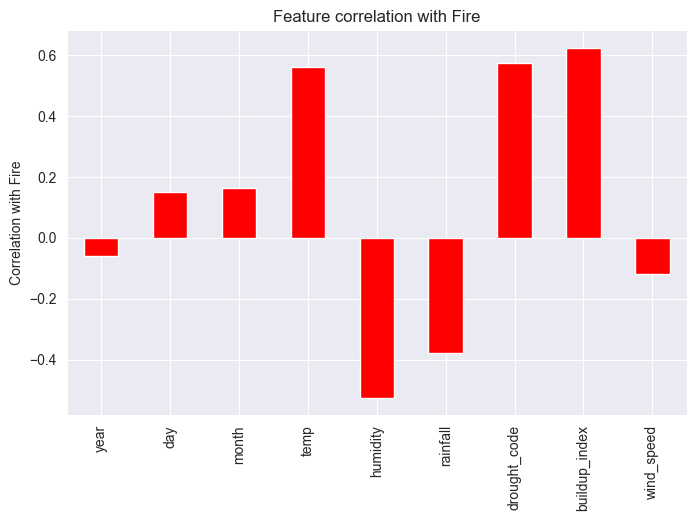

In [10]:
import matplotlib.pyplot as plt
features = ['year', 'day', 'month', 'temp','humidity','rainfall','drought_code','buildup_index','wind_speed']
target = 'fire'

correlations = df[features + [target]].corr()[target].drop(target)

print(correlations)
correlations.plot(kind='bar', figsize=(8,5), color='red')
plt.ylabel('Correlation with Fire')
plt.title('Feature correlation with Fire')
plt.show()

In [11]:
df = df.drop(columns=['year','day','wind_speed', 'month'])

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df.drop('fire', axis=1)

In [14]:
y = df['fire']

In [15]:
X_train, X_validate, y_train, y_validate = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
model = LogisticRegression(
    C = 1.0,
    penalty = 'l2',
    solver = 'lbfgs',
    max_iter= 1000
)

In [18]:
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [20]:
y_pred = model.predict(X_validate)

In [21]:
print("Accuracy:", accuracy_score(y_validate, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_validate, y_pred))
print("\nClassification Report:\n", classification_report(y_validate, y_pred))

Accuracy: 0.9032258064516129

Confusion Matrix:
 [[17  0]
 [ 3 11]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      1.00      0.92        17
         1.0       1.00      0.79      0.88        14

    accuracy                           0.90        31
   macro avg       0.93      0.89      0.90        31
weighted avg       0.92      0.90      0.90        31



In [22]:
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
penalties = ['l1', 'l2']
results = []

In [23]:
for penalty in penalties:
    for C in C_values:
        if penalty == 'l1':
            solver = 'liblinear'
        else:
            solver = 'lbfgs'

        try:
            model = LogisticRegression(
                C=C,
                penalty=penalty,
                solver=solver,
            )

            model.fit(X_train, y_train)

            y_pred = model.predict(X_validate)
            acc = accuracy_score(y_validate, y_pred)

            results.append({'C': C, 'penalty': penalty, 'solver': solver, 'accuracy': acc})

            print(f"C={C} penalty={penalty} solver={solver} --> Accuracy={acc}")
        except Exception as e:
            print(f"skipped C={C} penalty={penalty}: {e}")


C=0.001 penalty=l1 solver=liblinear --> Accuracy=0.45161290322580644
C=0.01 penalty=l1 solver=liblinear --> Accuracy=0.8709677419354839
C=0.1 penalty=l1 solver=liblinear --> Accuracy=0.8387096774193549
C=1 penalty=l1 solver=liblinear --> Accuracy=0.9032258064516129
C=10 penalty=l1 solver=liblinear --> Accuracy=0.9032258064516129
C=100 penalty=l1 solver=liblinear --> Accuracy=0.8387096774193549
C=0.001 penalty=l2 solver=lbfgs --> Accuracy=0.8387096774193549
C=0.01 penalty=l2 solver=lbfgs --> Accuracy=0.8709677419354839
C=0.1 penalty=l2 solver=lbfgs --> Accuracy=0.9032258064516129
C=1 penalty=l2 solver=lbfgs --> Accuracy=0.9032258064516129
C=10 penalty=l2 solver=lbfgs --> Accuracy=0.9032258064516129
C=100 penalty=l2 solver=lbfgs --> Accuracy=0.8709677419354839


In [24]:
C_values = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [25]:
for penalty in penalties:
    for C in C_values:
        if penalty == 'l1':
            solver = 'liblinear'
        else:
            solver = 'lbfgs'

        try:
            model = LogisticRegression(
                C=C,
                penalty=penalty,
                solver=solver,
            )

            model.fit(X_train, y_train)

            y_pred = model.predict(X_validate)
            acc = accuracy_score(y_validate, y_pred)

            results.append({'C': C, 'penalty': penalty, 'solver': solver, 'accuracy': acc})

            print(f"C={C} penalty={penalty} solver={solver} --> Accuracy={acc}")
        except Exception as e:
            print(f"skipped C={C} penalty={penalty}: {e}")

C=0.2 penalty=l1 solver=liblinear --> Accuracy=0.9032258064516129
C=0.3 penalty=l1 solver=liblinear --> Accuracy=0.9032258064516129
C=0.4 penalty=l1 solver=liblinear --> Accuracy=0.9032258064516129
C=0.5 penalty=l1 solver=liblinear --> Accuracy=0.9354838709677419
C=0.6 penalty=l1 solver=liblinear --> Accuracy=0.9032258064516129
C=0.7 penalty=l1 solver=liblinear --> Accuracy=0.9354838709677419
C=0.8 penalty=l1 solver=liblinear --> Accuracy=0.9354838709677419
C=0.9 penalty=l1 solver=liblinear --> Accuracy=0.9354838709677419
C=1 penalty=l1 solver=liblinear --> Accuracy=0.9032258064516129
C=2 penalty=l1 solver=liblinear --> Accuracy=0.9032258064516129
C=3 penalty=l1 solver=liblinear --> Accuracy=0.9032258064516129
C=4 penalty=l1 solver=liblinear --> Accuracy=0.9032258064516129
C=5 penalty=l1 solver=liblinear --> Accuracy=0.9032258064516129
C=6 penalty=l1 solver=liblinear --> Accuracy=0.9032258064516129
C=7 penalty=l1 solver=liblinear --> Accuracy=0.9032258064516129
C=8 penalty=l1 solver=li

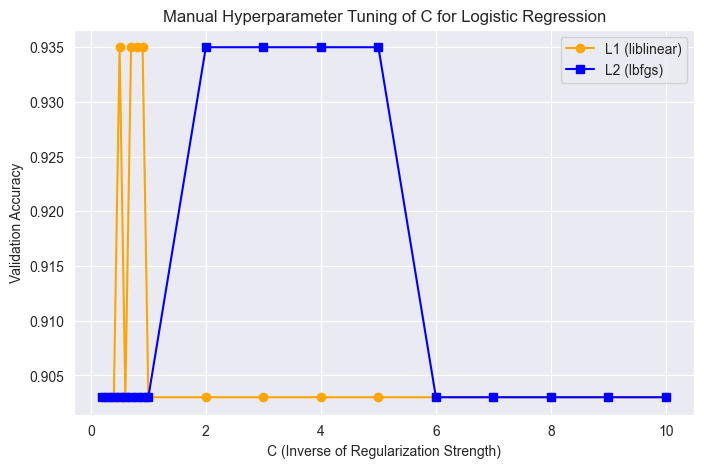

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'C': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'L1_liblinear': [0.903, 0.903, 0.903, 0.935, 0.903, 0.935, 0.935, 0.935, 0.903, 0.903, 0.903, 0.903, 0.903, 0.903, 0.903, 0.903, 0.903, 0.903],
    'L2_lbfgs':     [0.903, 0.903, 0.903, 0.903, 0.903, 0.903, 0.903, 0.903, 0.903, 0.935, 0.935, 0.935, 0.935, 0.903, 0.903, 0.903, 0.903, 0.903]
}

df = pd.DataFrame(data)

plt.figure(figsize=(8,5))
plt.plot(df['C'], df['L1_liblinear'], marker='o', label='L1 (liblinear)', color='orange')
plt.plot(df['C'], df['L2_lbfgs'], marker='s', label='L2 (lbfgs)', color='blue')
plt.xlabel('C (Inverse of Regularization Strength)')
plt.ylabel('Validation Accuracy')
plt.title('Manual Hyperparameter Tuning of C for Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
top_combinations = [
    {'C': 0.5, 'penalty': 'l1', 'solver': 'liblinear'},
    {'C': 0.7, 'penalty': 'l1', 'solver': 'liblinear'},
    {'C': 0.8, 'penalty': 'l1', 'solver': 'liblinear'},
    {'C': 2, 'penalty': 'l2', 'solver': 'lbfgs'},
    {'C': 3, 'penalty': 'l2', 'solver': 'lbfgs'},
    {'C': 4, 'penalty': 'l2', 'solver': 'lbfgs'},
    {'C': 5, 'penalty': 'l2', 'solver': 'lbfgs'}
]

In [28]:
preds = {}

for combo in top_combinations:
    C = combo['C']
    penalty = combo['penalty']
    solver = combo['solver']

    model = LogisticRegression(C=C, penalty=penalty, solver=solver, max_iter=5000)
    model.fit(X_train, y_train)
    preds[f"{penalty}_{C}"] = model.predict(X_validate)

In [29]:

for key, y_pred in preds.items():
    print(f"\n--- Confusion Matrix for {key} ---")
    print(confusion_matrix(y_validate, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_validate, y_pred))


--- Confusion Matrix for l1_0.5 ---
[[17  0]
 [ 2 12]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94        17
         1.0       1.00      0.86      0.92        14

    accuracy                           0.94        31
   macro avg       0.95      0.93      0.93        31
weighted avg       0.94      0.94      0.93        31


--- Confusion Matrix for l1_0.7 ---
[[16  1]
 [ 1 13]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94        17
         1.0       0.93      0.93      0.93        14

    accuracy                           0.94        31
   macro avg       0.93      0.93      0.93        31
weighted avg       0.94      0.94      0.94        31


--- Confusion Matrix for l1_0.8 ---
[[16  1]
 [ 1 13]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94        

In [30]:
C_values = [0.7,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.8,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.9]


In [31]:
for C in C_values:
    solver = 'liblinear'
    penalty = 'l1'
    try:
        model = LogisticRegression(
            C=C,
            penalty='l1',
            solver=solver,
        )

        model.fit(X_train, y_train)

        y_pred = model.predict(X_validate)
        acc = accuracy_score(y_validate, y_pred)

        results.append({'C': C, 'penalty': penalty, 'solver': solver, 'accuracy': acc})

        print(f"C={C} penalty={penalty} solver={solver} --> Accuracy={acc}")
    except Exception as e:
        print(f"skipped C={C} penalty={penalty}: {e}")

C=0.7 penalty=l1 solver=liblinear --> Accuracy=0.9354838709677419
C=0.71 penalty=l1 solver=liblinear --> Accuracy=0.9354838709677419
C=0.72 penalty=l1 solver=liblinear --> Accuracy=0.9354838709677419
C=0.73 penalty=l1 solver=liblinear --> Accuracy=0.9354838709677419
C=0.74 penalty=l1 solver=liblinear --> Accuracy=0.9354838709677419
C=0.75 penalty=l1 solver=liblinear --> Accuracy=0.9354838709677419
C=0.76 penalty=l1 solver=liblinear --> Accuracy=0.9354838709677419
C=0.77 penalty=l1 solver=liblinear --> Accuracy=0.9354838709677419
C=0.78 penalty=l1 solver=liblinear --> Accuracy=0.9354838709677419
C=0.79 penalty=l1 solver=liblinear --> Accuracy=0.9354838709677419
C=0.8 penalty=l1 solver=liblinear --> Accuracy=0.9354838709677419
C=0.81 penalty=l1 solver=liblinear --> Accuracy=0.9354838709677419
C=0.82 penalty=l1 solver=liblinear --> Accuracy=0.9354838709677419
C=0.83 penalty=l1 solver=liblinear --> Accuracy=0.9354838709677419
C=0.84 penalty=l1 solver=liblinear --> Accuracy=0.93548387096774

In [32]:
C_values = [3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0]

In [33]:
for C in C_values:
    solver = 'liblinear'
    penalty = 'l2'
    try:
        model = LogisticRegression(
            C=C,
            penalty=penalty,
            solver=solver,
        )

        model.fit(X_train, y_train)

        y_pred = model.predict(X_validate)
        acc = accuracy_score(y_validate, y_pred)

        results.append({'C': C, 'penalty': penalty, 'solver': solver, 'accuracy': acc})

        print(f"C={C} penalty={penalty} solver={solver} --> Accuracy={acc}")
    except Exception as e:
        print(f"skipped C={C} penalty={penalty}: {e}")

C=3.1 penalty=l2 solver=liblinear --> Accuracy=0.9354838709677419
C=3.2 penalty=l2 solver=liblinear --> Accuracy=0.9354838709677419
C=3.3 penalty=l2 solver=liblinear --> Accuracy=0.9354838709677419
C=3.4 penalty=l2 solver=liblinear --> Accuracy=0.9354838709677419
C=3.5 penalty=l2 solver=liblinear --> Accuracy=0.9354838709677419
C=3.6 penalty=l2 solver=liblinear --> Accuracy=0.9354838709677419
C=3.7 penalty=l2 solver=liblinear --> Accuracy=0.9354838709677419
C=3.8 penalty=l2 solver=liblinear --> Accuracy=0.9354838709677419
C=3.9 penalty=l2 solver=liblinear --> Accuracy=0.9354838709677419
C=4.0 penalty=l2 solver=liblinear --> Accuracy=0.9354838709677419
C=4.1 penalty=l2 solver=liblinear --> Accuracy=0.9354838709677419
C=4.2 penalty=l2 solver=liblinear --> Accuracy=0.9354838709677419
C=4.3 penalty=l2 solver=liblinear --> Accuracy=0.9354838709677419
C=4.4 penalty=l2 solver=liblinear --> Accuracy=0.9354838709677419
C=4.5 penalty=l2 solver=liblinear --> Accuracy=0.9354838709677419
C=4.6 pena

In [34]:
df_test = pd.read_csv("wildfires_test.csv")

In [35]:
enc = OrdinalEncoder(categories=[is_fire])

In [36]:
df_test['fire'] = enc.fit_transform(df_test[['fire']])

In [37]:
df_test

,fire,year,temp,humidity,rainfall,drought_code,buildup_index,day,month,wind_speed
0,0.0,2015,33,68,4.5,9.12,5.09,19,6,16
1,1.0,2009,28,56,0.0,38.17,21.21,12,6,18
2,0.0,2017,30,64,0.6,15.38,6.24,24,9,19
3,0.0,2007,23,74,8.3,7.36,2.27,14,9,28
4,0.0,2017,31,72,0.3,30.47,5.63,7,9,17
5,0.0,2013,30,73,0.1,16.28,3.58,4,9,18
6,1.0,2015,34,66,0.0,210.55,62.99,28,8,16
7,1.0,2013,36,67,0.0,131.20,34.92,20,8,19
8,0.0,2012,34,74,0.0,18.95,8.94,11,7,15
9,0.0,2015,32,70,1.4,10.05,8.31,9,7,16


In [38]:
df_test = df_test.drop(columns=['year', 'day', 'wind_speed', 'month'])

In [39]:
X_test = df_test.drop(columns=['fire'], errors='ignore')
y_test = df_test['fire']

In [40]:
best_model = LogisticRegression(C=4, penalty='l2')

In [41]:
best_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,4
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [42]:
y_pred_test = best_model.predict(X_test)
df_test['predicted_fire'] = y_pred_test

In [43]:
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

Accuracy: 0.88

Confusion Matrix:
 [[18  4]
 [ 2 26]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.82      0.86        22
         1.0       0.87      0.93      0.90        28

    accuracy                           0.88        50
   macro avg       0.88      0.87      0.88        50
weighted avg       0.88      0.88      0.88        50



In [44]:
df_test['predicted_fire_lr'] = y_pred_test
df_test[['fire', 'predicted_fire_lr']].to_csv('lr_test_predictions.csv', index=False)